In [1]:
from pyADAPT.examples.toy import ToyModel
from pyADAPT.dataset import DataSet
from pyADAPT.optimize import Optimizer, optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model = ToyModel()
data = DataSet(
        raw_data_path="../../data/toyModel/toyData.mat",
        data_specs_path="../../data/toyModel/toyData.yaml",
    )

# pyADAPT and toy model

`optimize` will be the routine that exposes a interface of ADAPT to the user.

In [4]:
help(optimize)

Help on function optimize in module pyADAPT.optimize:

optimize(model, dataset, *params, n_iter=10, n_tstep=100, n_core=4, verbose=True)
    the main optimization procedure
    
    Parameter
    ---------
    model: a model instance of subclass of BaseModel
    dataset: dataset
    params: list of parameters to be optimized
    n_core: number of processes to spawn
    
    Return
    ------
    (parameter trajectories, state trajectories, time)
    trajectories are xarray.DataArray. just easier to manipulate in the analysis
    routine.



the parameters in the model is stored as a pandas dataframe, with can be sliced using the labels.

In [6]:
model.parameters.loc[['k1','k2', 'k3', 'k4', 'k5']]

,name,value,vary,lb,ub,init
k1,k1,1.0,True,0,inf,1.0
k2,k2,1.0,False,0,inf,1.0
k3,k3,0.1,False,0,inf,0.1
k4,k4,0.5,False,0,inf,0.5
k5,k5,1.0,False,0,inf,1.0


In [9]:
model.reset()
param_traj, state_traj, time = optimize(model, data, 'k1', n_iter=200, n_tstep=50, n_core=4)

The shape of the trajectories means iteration, time step, and name of the parameter/state, respectively.

In [10]:
state_traj.shape, param_traj.shape

((200, 50, 4), (200, 50, 1))

Since the trajectories are 3-d data, pandas dataframe is not convenient. The trajectories are returned as `xarray.DataArray`. The coordinates and dimensions can be used to select and slicing the data.

In [11]:
state_traj.coords, param_traj.coords

(Coordinates:
   * iter     (iter) int32 0 1 2 3 4 5 6 7 8 ... 192 193 194 195 196 197 198 199
   * time     (time) float64 0.0 0.2041 0.4082 0.6122 ... 9.388 9.592 9.796 10.0
   * state    (state) <U2 's1' 's2' 's3' 's4',
 Coordinates:
   * iter     (iter) int32 0 1 2 3 4 5 6 7 8 ... 192 193 194 195 196 197 198 199
   * time     (time) float64 0.0 0.2041 0.4082 0.6122 ... 9.388 9.592 9.796 10.0
   * param    (param) <U2 'k1')

Text(0.5, 1.0, '$k_1$')

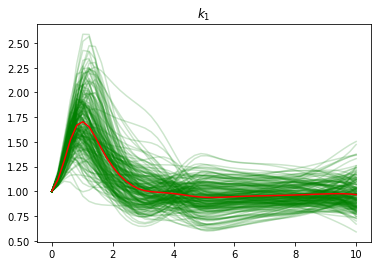

In [12]:
fig, axes = plt.subplots()
for i in param_traj.coords['iter']:
    axes.plot(time, param_traj.loc[i, :, 'k1'], color="green", alpha=0.2)
axes.plot(time, param_traj.sel(param="k1").mean(dim="iter"), color="red")
axes.set_title("$k_1$")

This result is similar to the result in the MFI MATLAB implementation of Pascal van Beek. The difference is the peek of the pyADAPT result is slightly lower. I am still investigating the result for this.

![k1-matlab-altInit](pvbeek-matlab-toy-altinit-k1.png)

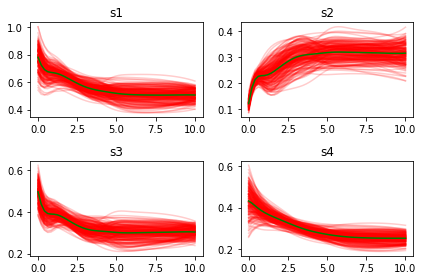

In [13]:
fig, axes= plt.subplots(2, 2)

for a, s in enumerate(state_traj.coords['state']):
    ax = axes.flatten()[a]
    for i in state_traj.coords['iter']:
        ax.plot(time, state_traj.sel(iter=i, state=s), color="red", alpha=0.2)
    ax.set_title(str(s.data))
    ax.plot(time, state_traj.sel(state=s).mean(dim="iter"), color="green")
fig.tight_layout()

Compare with the states in MFI's result

![k1-matlab-altInit](pvbeek-matlab-toy-altinit-states.png)